I discovered why it was going so well! It was thanks to the ordered labels tant were amost sequential wrt the classification. Now performances are much more normal.

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder



In [26]:

df = pd.read_csv('PR-graphomics/reduced_graphomics.csv')

X = pd.DataFrame.copy(df)
y = X.pop('Group')
sssatan =  X.pop('Unnamed: 0')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sssatan


0        0
1        1
2        2
3        3
4        4
      ... 
295    295
296    296
297    297
298    298
299    299
Name: Unnamed: 0, Length: 300, dtype: int64

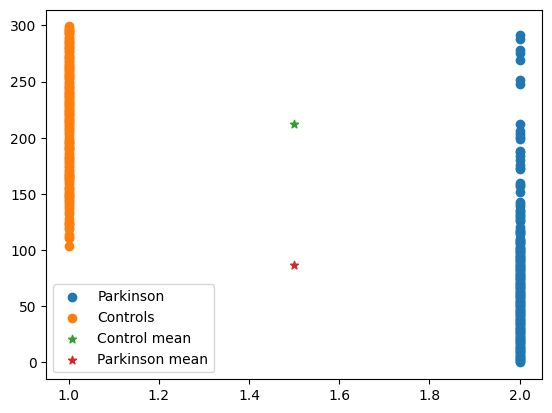

In [29]:
P_index = []
C_index = []

for group, index in zip(y, sssatan):
    if group == 'PD':
        P_index.append(index)
    else:
        C_index.append(index)

plt.scatter(np.ones(len(P_index))*2, P_index, label =  'Parkinson')
plt.scatter(np.ones(len(C_index)), C_index, label = 'Controls')
plt.scatter([1.5], np.mean(C_index), marker = '*' ,  label = 'Control mean')
plt.scatter([1.5], np.mean(P_index), marker = '*' , label = 'Parkinson mean')
plt.legend()
plt.show()
        

False

Best parameters for Decision Tree: {'classifier__max_depth': 9, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Best cross-validated accuracy for Decision Tree: 0.58
Mean CV Accuracy (cross_val_score): 0.58 ± 0.08
Final Decision Tree accuracy on test set: 0.58

Decision Tree Classification Report:
              precision    recall  f1-score   support

          PD       0.59      0.67      0.63        48
   Prodromal       0.56      0.48      0.51        42

    accuracy                           0.58        90
   macro avg       0.57      0.57      0.57        90
weighted avg       0.58      0.58      0.57        90



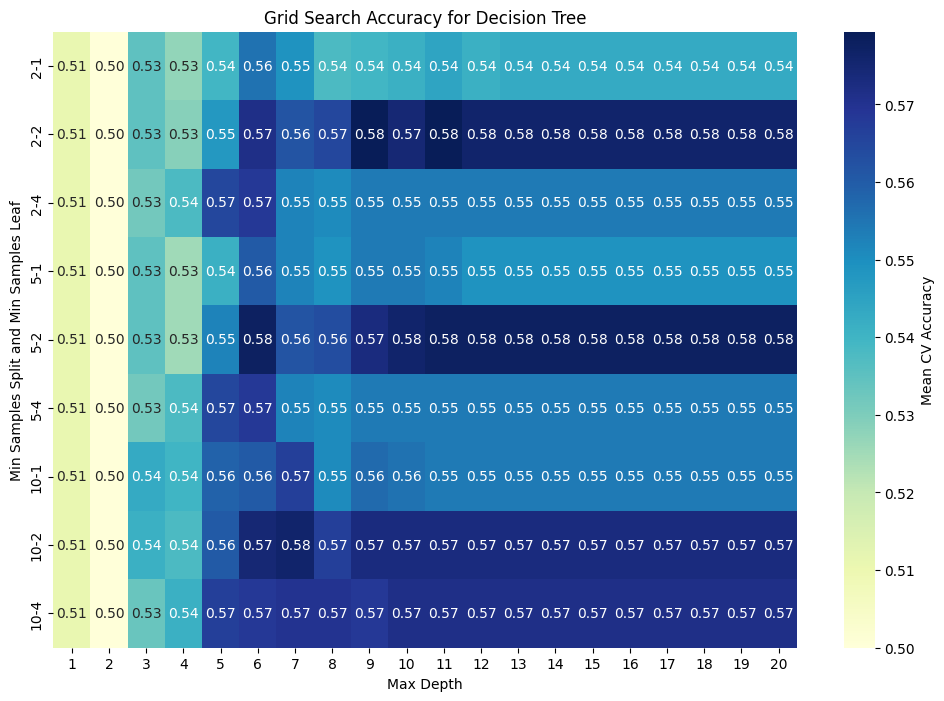

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is already loaded
X = df.copy()
y = X.pop('Group')
sssatan =  X.pop('Unnamed: 0')


# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid_tree = {
    'classifier__max_depth': np.arange(1, 21),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define cross-validation strategy
cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize GridSearchCV
grid_search_tree = GridSearchCV(pipeline, param_grid_tree, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_
print("Best parameters for Decision Tree:", best_params_tree)
print(f"Best cross-validated accuracy for Decision Tree: {best_score_tree:.2f}")

# Evaluate using cross_val_score for consistent scoring on training data
cv_scores = cross_val_score(grid_search_tree.best_estimator_, X_train, y_train, cv=cv_strategy, scoring='accuracy')
print(f"Mean CV Accuracy (cross_val_score): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Train a final model with the best parameters and evaluate on the test set
best_tree = grid_search_tree.best_estimator_
best_tree.fit(X_train, y_train)

y_pred_tree = best_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Final Decision Tree accuracy on test set: {accuracy_tree:.2f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_))

# Convert grid search results to a DataFrame for heatmap plotting
results_df_tree = pd.DataFrame(grid_search_tree.cv_results_)

# Create a pivot table to structure data for the heatmap
pivot_table_tree = results_df_tree.pivot_table(
    values="mean_test_score",
    index=["param_classifier__min_samples_split", "param_classifier__min_samples_leaf"],
    columns="param_classifier__max_depth"
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_tree, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Max Depth")
plt.ylabel("Min Samples Split and Min Samples Leaf")
plt.title("Grid Search Accuracy for Decision Tree")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Set up the parameter grid for GridSearchCV
param_grid_tree = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define cross-validation strategy
cv_strategy = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)

decision_tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_
print("Best parameters for Decision Tree:", best_params_tree)
print(f"Best cross-validated accuracy for Decision Tree: {best_score_tree:.2f}")


# Evaluate using cross_val_score for consistent scoring on training data
cv_scores = cross_val_score(grid_search_tree.best_estimator_, X_train, y_train, cv=cv_strategy, scoring='accuracy')
print(f"Mean CV Accuracy (cross_val_score): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Train a final model with the best parameters and evaluate on the test set
best_tree = grid_search_tree.best_estimator_
best_tree.fit(X_train, y_train)

y_pred_tree = best_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Final Decision Tree accuracy on test set: {accuracy_tree:.2f}")



Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validated accuracy for Decision Tree: 0.52
Mean CV Accuracy (cross_val_score): 0.52 ± 0.10
Final Decision Tree accuracy on test set: 0.59


In [30]:
feature_importances = best_tree.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
feature_importances_df


,Feature,Importance
0,EulerNumber,0.126406
1,ModularityScore,0.000000
2,NumberOfConnectedComponents,0.000000
3,NumberOfEdges,0.184725
4,NumberOfMaximalCliques,0.000000
5,NumberOfNodes,0.000000
6,NumberOfPendantNodes,0.000000
7,SelfLinks,0.179108
8,AverageShortestPathLength,0.000000
9,FractalDimension,0.000000


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Set up the parameter grid for GridSearchCV
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest and GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
grid_search_forest = GridSearchCV(random_forest, param_grid_forest, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_
print("Best parameters for Random Forest:", best_params_forest)
print(f"Best cross-validated accuracy for Random Forest: {best_score_forest:.2f}")

# Train a final model with the best parameters
best_forest = RandomForestClassifier(**best_params_forest, random_state=42)
best_forest.fit(X_train, y_train)

# Evaluate on the test set
y_pred_forest = best_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Final Random Forest accuracy on test set: {accuracy_forest:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest, target_names=label_encoder.classes_))

# Convert grid search results to a DataFrame for heatmap plotting
results_df_forest = pd.DataFrame(grid_search_forest.cv_results_)

# Filter only relevant columns for heatmap
# (Due to multidimensionality, we’ll focus on one heatmap for each combination)

# Pivot table for max_depth and n_estimators
pivot_table_forest = results_df_forest.pivot_table(
    values="mean_test_score",
    index="param_n_estimators",
    columns="param_max_depth"
)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_forest, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.title("Grid Search Accuracy for Random Forest")
plt.show()

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.61
Final Random Forest accuracy on test set: 0.58

Random Forest Classification Report:


TypeError: object of type 'numpy.int64' has no len()